# **🔶 Predicting hospital readmission of Diabetic Patients 🔶**

--------------------------------------------------------------------------------------------------------------------------------------------------------

### NAME: SUVIDYA NP
### ORGANIZATION: ENTRI ELEVATE
### DATE:

--------------------------------------------------------------------------------------------------------------------------------------------------------

## **💠 Overview of Problem Statement 💠**

#### Hospital readmission is a critical issue in healthcare, especially for diabetic patients who require ongoing management. This project aims to build a machine learning model that predicts whether a diabetic patient will be readmitted to the hospital within 30 days after discharge. A high readmission rate leads to increased hospital costs, patient burden, and resource constraints. By predicting which patients are at a higher risk of readmission, hospitals can take preventive actions to improve patient outcomes and reduce costs.

## **💠 Objective 💠**

#### The objective of this project is to develop a machine learning model that predicts whether a diabetic patient will be readmitted to the hospital within 30 days.

## **💠 Data Description 💠**
- #### Source: This dataset is from UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008).
- #### Features: This dataset contains 101766 rows and 50 columns


## **Dataset Overview and Column Description** :

#### encounter_id	:	Unique identifier for each hospital encounter (visit).
#### patient_nbr	:	Unique identifier for each patient (same patient can have multiple encounters).
#### race	:	Patient's race (e.g., Caucasian, African-American).
#### gender	:	Patient's gender (Male or Female).
#### age	:	Age group of the patient (e.g., 70-80).
#### weight	:	Patient's weight (may have missing values).
#### admission_type_id	:	Type of admission (e.g., emergency, urgent, elective).
#### discharge_disposition_id	:	How the patient was discharged (e.g., to home, transferred to another hospital).
#### admission_source_id	:	Source of admission (e.g., physician referral, emergency room).
#### time_in_hospital	:	Number of days the patient stayed in the hospital.
#### payer_code	:	Insurance provider or payer.
#### medical_specialty	:	Type of medical specialty providing care (e.g., cardiology, endocrinology).
#### num_lab_procedures	:	Number of lab tests performed during the encounter.
#### num_procedures	:	Number of medical procedures performed during the encounter.
#### num_medications	:	Number of medications prescribed during the encounter.
#### number_outpatient	:	Number of outpatient visits for the patient.
#### number_emergency	:	Number of emergency visits for the patient.
#### number_inpatient	:	Number of inpatient visits for the patient.
#### diag_1	:	Primary diagnosis code (ICD-9 format).
#### diag_2	:	Secondary diagnosis code (ICD-9 format).
#### diag_3	:	Tertiary diagnosis code (ICD-9 format).
#### number_diagnoses	:	Number of diagnoses recorded during the encounter.
#### max_glu_serum	:	Max glucose serum test result (e.g., >200, >300).
#### A1Cresult	:	Hemoglobin A1c test result (e.g., >7, >8).
#### metformin	:	Whether the patient was on metformin medication (Yes/No).
#### repaglinide	:	Whether the patient was on repaglinide medication (Yes/No).
#### nateglinide	:	Whether the patient was on nateglinide medication (Yes/No).
#### chlorpropamide	:	Whether the patient was on chlorpropamide medication (Yes/No).
#### glimepiride	:	Whether the patient was on glimepiride medication (Yes/No).
#### acetohexamide	:	Whether the patient was on acetohexamide medication (Yes/No).
#### glipizide	:	Whether the patient was on glipizide medication (Yes/No).
#### glyburide	:	Whether the patient was on glyburide medication (Yes/No).
#### tolbutamide	:	Whether the patient was on tolbutamide medication (Yes/No).
#### pioglitazone	:	Whether the patient was on pioglitazone medication (Yes/No).
#### rosiglitazone	:	Whether the patient was on rosiglitazone medication (Yes/No).
#### acarbose	:	Whether the patient was on acarbose medication (Yes/No).
#### miglitol	:	Whether the patient was on miglitol medication (Yes/No).
#### troglitazone	:	Whether the patient was on troglitazone medication (Yes/No).
#### tolazamide	:	Whether the patient was on tolazamide medication (Yes/No).
#### examide	:	Whether the patient was on examide medication (Yes/No).
#### citoglipton	:	Whether the patient was on citoglipton medication (Yes/No).
#### insulin	:	Whether the patient was on insulin medication (Yes/No).
#### glyburide-metformin	:	Whether the patient was on glyburide-metformin medication (Yes/No).
#### glipizide-metformin	:	Whether the patient was on glipizide-metformin medication (Yes/No).
#### glimepiride-pioglitazone	:	Whether the patient was on glimepiride-pioglitazone medication (Yes/No).
#### metformin-rosiglitazone	:	Whether the patient was on metformin-rosiglitazone medication (Yes/No).
#### metformin-pioglitazone	:	Whether the patient was on metformin-pioglitazone medication (Yes/No).
#### change	:	Whether the medication was changed during the encounter (Yes/No).
#### diabetesMed	:	Whether the patient was on diabetes medication (Yes/No).
#### readmitted	:	Whether the patient was readmitted within 30 days, after 30 days, or not readmitted.

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **1) <u>Data Collection</u> :**

### **⏬ Import Libraries :**

In [13]:
#basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats
import math

#preprocessing:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PowerTransformer, label_binarize
from sklearn.impute import SimpleImputer

#feature selection:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#model building and evaluation:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#metrics:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

#pipeline:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### **⏬ Load Dataset :**

In [15]:
df=pd.read_csv("C:/Users/suvid/Downloads/diabetic_data.csv")
df.T  #dataframe.

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,140199494,181593374,120975314,86472243,50375628,100162476,74694222,41088789,31693671,175429310
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Other,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Female,Male,Female,Male,Female,Male,Female,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),...,[60-70),[70-80),[80-90),[80-90),[60-70),[70-80),[80-90),[70-80),[80-90),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,...,1,1,1,1,1,1,1,1,2,1
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,3,4,1,3,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,...,7,7,7,7,7,7,5,7,7,7
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,2,5,5,1,6,3,5,1,10,6


### **⏬ Display the Summary of DataFrame :**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### **⏬ Show Columns and Rows counts :**

In [19]:
df.shape

(101766, 50)

### 🟢 The shape of the dataset is 101766,50 means it has *101766 rows* and *50 columns*.

### **⏬ Statistical Summary of Numeric Columns :**

In [22]:
df.describe() #it will return a table with the statistical measures for numeric columns.

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


- ### ***count*** (Number of non-null values in each column),
- ### ***mean*** (Average value),
- ### ***std*** (Standard deviation (spread of data)),
- ### ***min*** (Minimum value),
- ### ***25%*** (1st quartile (25% of data is below this)),
- ### ***50%*** (Median (middle value)),
- ### ***75%*** (3rd quartile (75% of data is below this)) and
- ### ***max*** (Maximum value).

### **⏬ Check Missing Values :**

In [25]:
df.isnull().sum() #checking for missing values in each cell of dataframe and counting the total number of missing values of each columns.

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### **⏬ Count Unique Values :**

In [27]:
df.nunique() #counting the number of unique values in each column of the DataFrame.

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

### **⏬ Countplot of Readmission Status :**

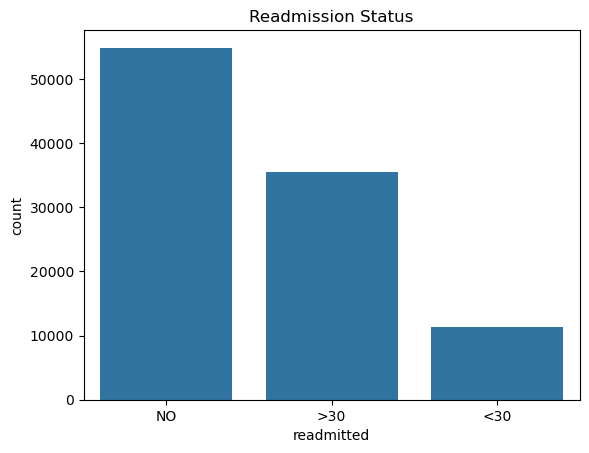

In [29]:
sns.countplot(x='readmitted',data= df) #creating a countplot for the readmitted column.
plt.title("Readmission Status") #giving title.
plt.show() #to display.

### 🟢 Showing how many patients were ***readmitted*** and ***not readmitted***.
- ###  ***NO*** - not readmitted
- ### ***<30*** - Readmitted within 30 days
- ### ***>30*** - Readmitted after 30 days

### **⏬ Boxplot of Time in Hospital vs Readmission Status :**

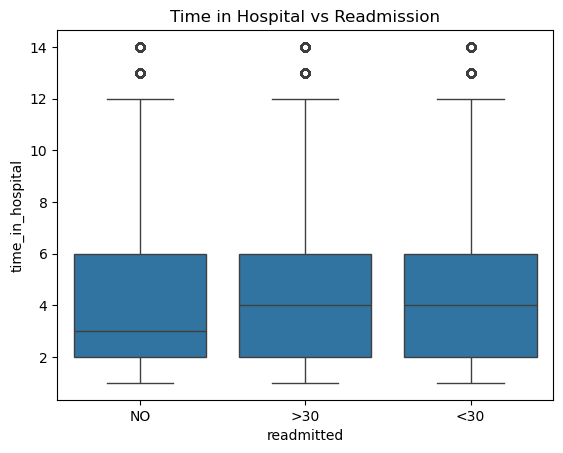

In [32]:
#showing boxplot of time in hospital vs readmission:
sns.boxplot(x='readmitted',y='time_in_hospital',data=df)
plt.title("Time in Hospital vs Readmission") #giving title.
plt.show() #to display.

### 🟢 It is helping to compare how long patients stay in the hospital based on their readmission status.
- ### ***x-axis*** represents different readmission categories. e.g., *NO*, *<30*, *>30*
- ### ***y-axis*** represents "time_in_hospital" (length of stay in days).

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **2) <u>Data Preprocessing</u> - <u>Data Cleaning</u> :**

### ***Data cleaning*** is an essential step in preparing data for analysis. Raw data often comes with mistakes, missing information, and inconsistencies, which can lead to inaccurate results in machine learning models. By cleaning the data, we make sure it's accurate, consistent, and reliable, setting the foundation for meaningful insights and better predictions.

### **⏬ Checking for Duplicate Rows :**

In [38]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool

- ### ***True*** - The row is a duplicate of a previous row.
- ### ***False*** - The row is unique.

### **⏬ Verifying the Presence of Duplicate Rows :**

In [41]:
if not df.duplicated().any():
    print("There are no duplicate values")
else:
    print("Duplicate values found")

There are no duplicate values


### **⏬ Checking for Missing Values in the DataFrame :**

In [43]:
missing_values=df.isnull().sum()
missing_values=missing_values[missing_values>0]    #showing only columns which has missing values.
print(missing_values)

max_glu_serum    96420
A1Cresult        84748
dtype: int64


### 🟢 Columns ***max_glu_serum*** has 96420 missing values and ***A1Cresult*** has 84748 missing values.

### **⏬ Dropping Columns with Missing Values :**

In [46]:
df.drop(columns=['max_glu_serum','A1Cresult'],inplace=True)

### 🟢 Both columns missing more than ***80%*** of values.

### ⏬ *id columns* (***encounter_id*** , ***admission_type_id*** , ***discharge_disposition_id*** , ***admission_source_id***) are not mandatory for prediction. So removing those columns.

In [49]:
#list of columns to drop:
drop_cols = ['encounter_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

#drop columns from the DataFrame:
df = df.drop(columns=drop_cols)

#verifying if the columns are removed:
print("Remaining columns:", df.columns)

Remaining columns: Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [50]:
df.shape

(101766, 44)

### **⏬ Transposed Statistical Summary of Numeric Columns :**

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,87545949.75,189502619.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,57.00,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,20.00,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.00,42.0
number_emergency,101766.0,1.978362e-01,9.304723e-01,0.0,0.0,0.0,0.00,76.0
number_inpatient,101766.0,6.355659e-01,1.262863e+00,0.0,0.0,0.0,1.00,21.0
number_diagnoses,101766.0,7.422607e+00,1.933600e+00,1.0,6.0,8.0,9.00,16.0


### **⏬ Transposed View of the First Five Rows :**

In [54]:
df.head().T  #(T: Transposes the DataFrame, converting rows into columns and vice versa)

,0,1,2,3,4
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
time_in_hospital,1,3,2,2,1
payer_code,?,?,?,?,?
medical_specialty,Pediatrics-Endocrinology,?,?,?,?
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0


### **⏬ Transposed View of the Last Five Rows :**

In [56]:
df.tail().T

,101761,101762,101763,101764,101765
patient_nbr,100162476,74694222,41088789,31693671,175429310
race,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Male,Female,Male,Female,Male
age,[70-80),[80-90),[70-80),[80-90),[70-80)
weight,?,?,?,?,?
time_in_hospital,3,5,1,10,6
payer_code,MC,MC,MC,MC,?
medical_specialty,?,?,?,Surgery-General,?
num_lab_procedures,51,33,53,45,13
num_procedures,0,3,0,2,3


### **⏬ Creating a Backup of the Original DataFrame :**

In [58]:
df1=df.copy() 

### 🟢 Creating ***copy of df***.

In [60]:
df.shape

(101766, 44)

### **⏬ Selecting Numeric Columns from the DataFrame :**

In [62]:
num_cols=df.select_dtypes(include=['number']).columns.tolist()

- ### It selects all columns from the dataframe ***df1*** that have numeric data types like int64 and float64.
- ### The ***boxplot function works only with numerical data***, so we need to extract only numeric columns.

### ⏬ **Boxplot of Numeric Columns Before Removing Outliers :**

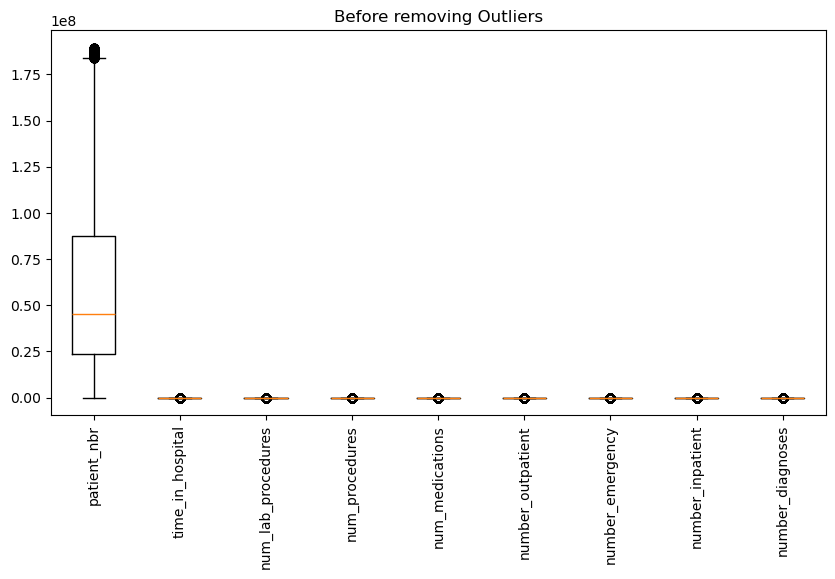

In [65]:
#checking for ouliers:
plt.figure(figsize=(10,5)) #setting figure size
plt.boxplot([df[col].dropna().values for col in num_cols],labels=num_cols) #to extract values from each numerical column while dropping missing values.
plt.xticks(rotation=90) #to rotate x-axis labels for readability.
plt.title("Before removing Outliers") #giving title.
plt.show() #to display.

## **💠 <u>Outlier</u> 💠**
### An outlier is a value that doesn’t fit in with the rest of the data in a dataset. it’s either ***much higher*** or ***much lower*** than what we’d expect. This can happen for many reasons, like a mistake in data entry, an error in measurement, or just natural variations in the data. If we don’t handle outliers properly, they can throw off our analysis and make our model less accurate.

### **🔹 Most Commonly used Methods for Outlier Detection and Removal are :**
### 1) ***Z-Score Method*** - For normally distributed data.
### 2) ***IQR (Interquartile Range) Method*** - For small datasets.
### 3) ***Winsorization*** - If want to retain the data structure.
### 4) ***Isolation Forest*** -  For large datasets.
### 5) ***Local Outlier Factor (LOF)*** - When clusters are involved.

### Here I'm using ***IQR*** Method.
## 💠<u>**IQR Method** for Detecting Outliers</u>
### The ***Interquartile Range (IQR)*** method is a simple way to spot unusual values (outliers) in a dataset. Instead of looking at the entire range of numbers, it focuses on the middle portion, where most of the data is expected to be.

### **⏬ Removing Outliers Using the IQR Method :**

In [70]:
#checking the size before removing outliers:
print(f"Original size: {df.shape}")

def remove_outliers(df,column):
    Q1=df[column].quantile(0.25) #calculating the first quartile (Q1), which is the 25th percentile of the column’s values.
    Q3=df[column].quantile(0.75) #calculating the third quartile (Q3), which is the 75th percentile of the column’s values.
    IQR=Q3-Q1                    #computing the Interquartile Range (IQR): it represents the middle 50% of the data and helps in detecting outliers.
    lower_bound=Q1-1.5*IQR       #any value below is considered an outlier.
    upper_bound=Q3+1.5*IQR       #any value above is considered an outlier.
    df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]  #filtering Data and Remove Outliers.
    return df                    #returning the filtered DataFrame (without outliers).

#outlier removing for numerical features:
for col in num_cols:             #iterating through each numerical column in the dataset.
    df=remove_outliers(df,col)

#checking the size after removing outliers:
print(f"After outlier removal: {df.shape}")

Original size: (101766, 44)
After outlier removal: (66398, 44)


### **⏬ Boxplot of Numeric Columns After Removing Outliers :**

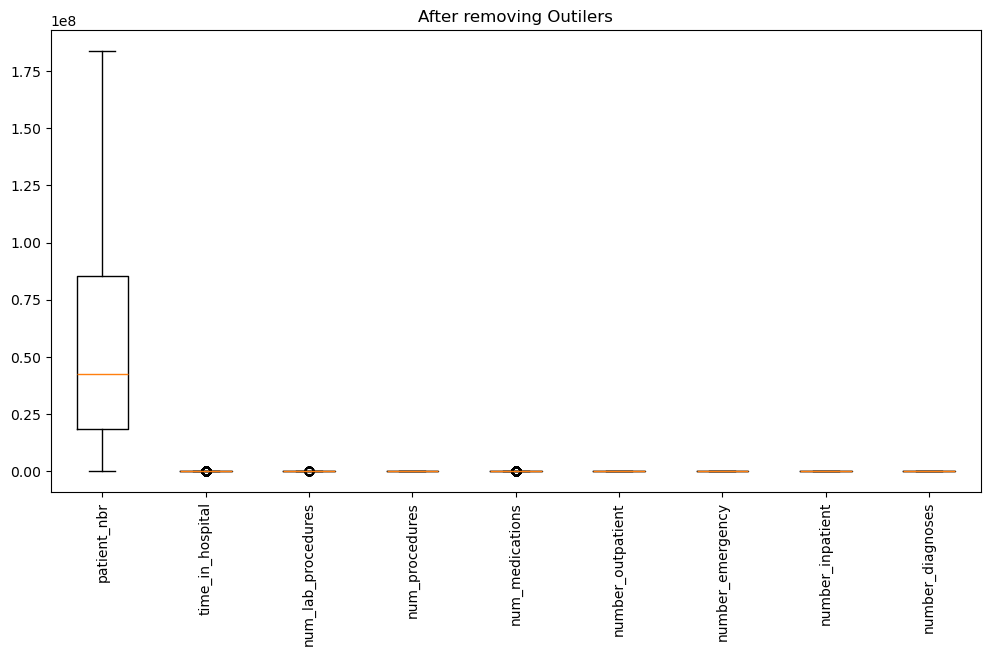

In [72]:
plt.figure(figsize=(12,6))
plt.boxplot([df[col].dropna().values for col in num_cols],labels=num_cols)
plt.xticks(rotation=90)
plt.title("After removing Outilers")
plt.show()

### **⏬ Removing Outliers again Using the IQR Method :**

Shape after outlier removal: (62535, 44)


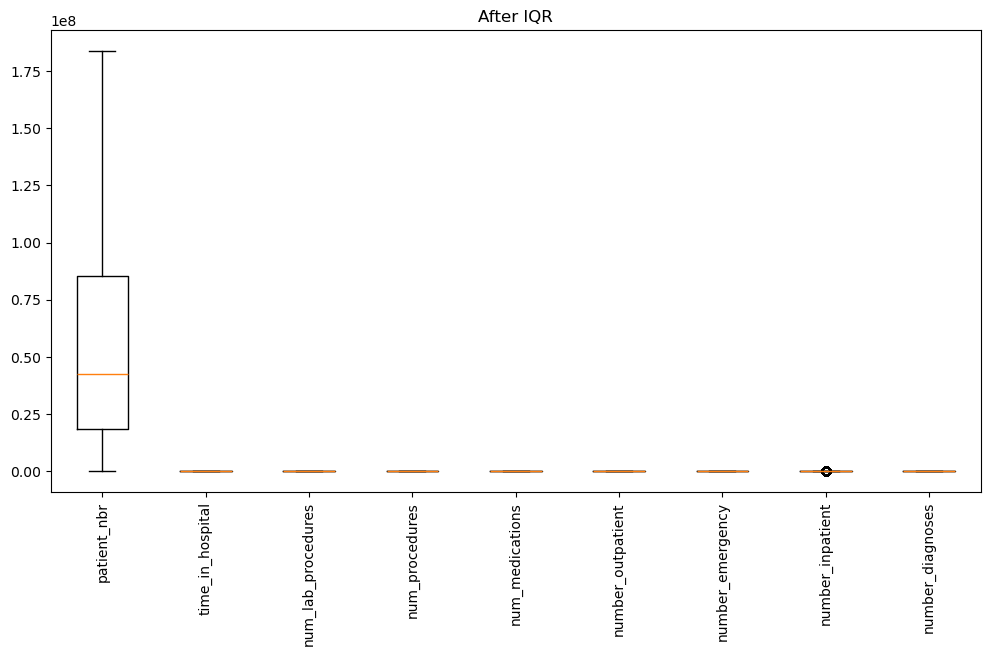

In [74]:
columns = ['time_in_hospital', 'num_lab_procedures', 'num_medications']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in columns:
    df = remove_outliers_iqr(df, col)
    
print(f"Shape after outlier removal: {df.shape}")

plt.figure(figsize=(12, 6))
plt.boxplot([df[col].dropna().values for col in num_cols], labels=num_cols)
plt.xticks(rotation=90)
plt.title("After IQR")
plt.show()

### **🔴 Description :**
### After removing outliers using IQR, I found that, outliers of columns ***time_in_hospital, num_lab_procedures and num_medications*** has been removed. But new outlier detected on column ***number_inpatient***.

### **⏬ Removing Outliers Using the Z-Score Method :**

Shape after Z-Score: (62535, 44)


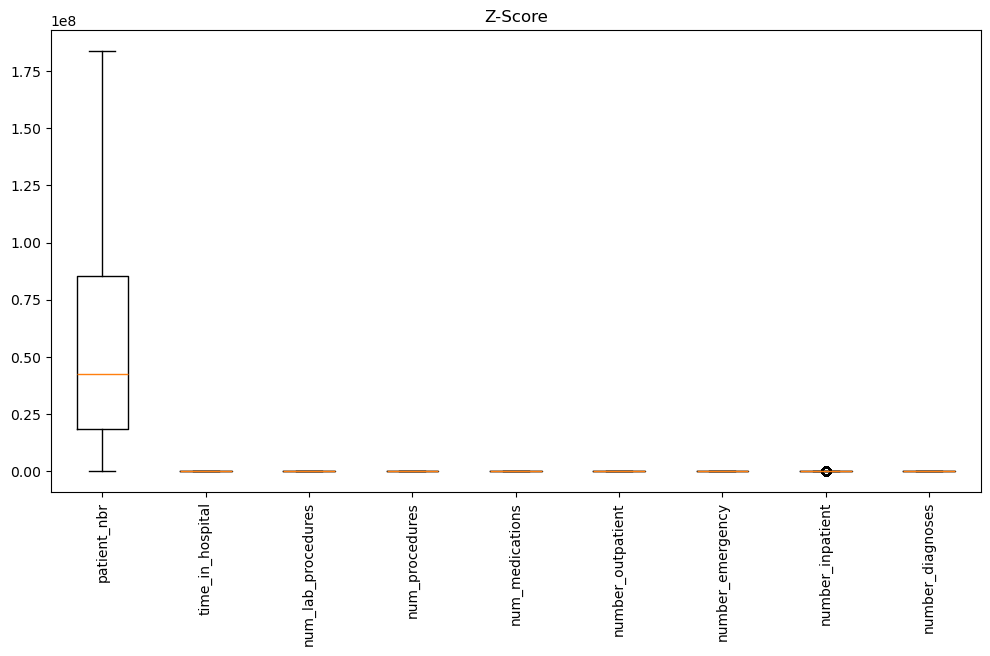

In [77]:
#column to apply Z-Score
column = 'number_inpatient'

#removing outliers using Z-Score (threshold = 3)
z_scores = np.abs(stats.zscore(df[column]))
df = df[(z_scores < 3)]  # Keep rows where all z-scores are below threshold

print("Shape after Z-Score:",df.shape)


plt.figure(figsize=(12, 6))
plt.boxplot([df[col].dropna().values for col in num_cols], labels=num_cols)
plt.xticks(rotation=90)
plt.title("Z-Score")
plt.show()

### **⏬ Removing Outliers Using the IsolationForest Method :**

Shape after IsolationForest: (62535, 44)


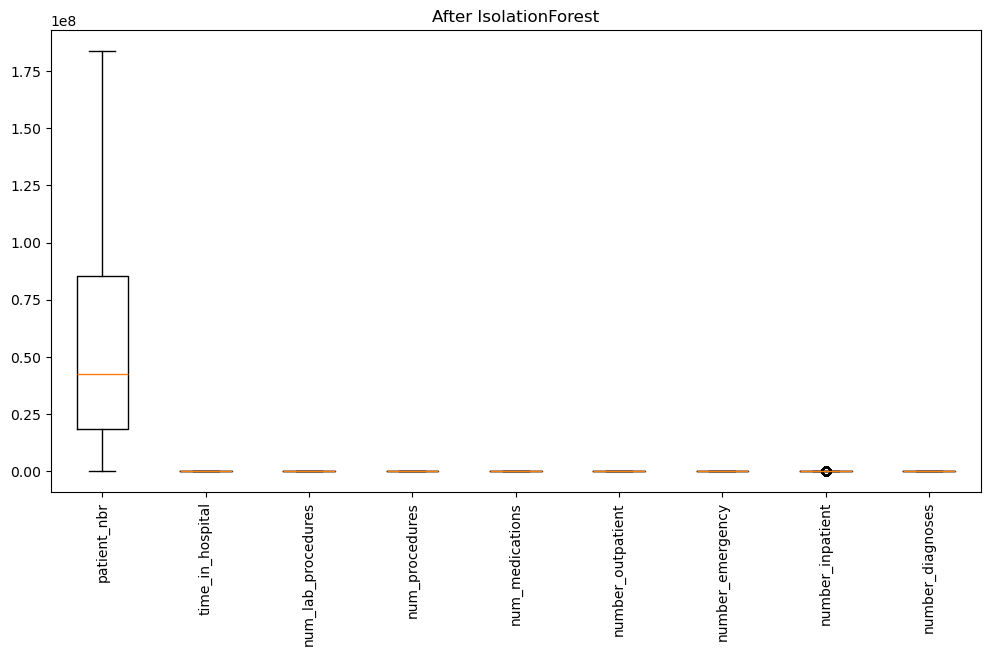

In [79]:
#fit Isolation Forest:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[['number_inpatient']])

#remove outliers:
df = df[outliers == 1]

print("Shape after IsolationForest:", df.shape)

plt.figure(figsize=(12, 6))
plt.boxplot([df[col].dropna().values for col in num_cols], labels=num_cols)
plt.xticks(rotation=90)
plt.title("After IsolationForest")
plt.show()

### **🔴 Description :**
### Column ***number_inpatient*** is still showing outliers even after applying Z-Score and IsolationForest.

## 💠<u>**Handling Outliers**</u>💠

### Even after applying the methods to remove outliers, we still see some outliers in the dataset. Instead of removing them completely, we’ll use ***capping (Winsorization)***. This ensures that keeping our data balanced while making sure we don’t lose any valuable insights.

## 💠<u>**Capping**</u>💠
### Capping is a way to handle extreme values without completely removing them. Instead of removing outliers, ***we adjust them to an acceptable range so they don’t affect our analysis***.

- ### If a value is ***too low*** (below the lower limit), we push it up to the lower limit.
- ### If a value is ***too high*** (above the upper limit), we bring it down to the upper limit.
- ### This method keeps our data within a reasonable range while still maintaining its overall pattern and meaning.

### **⏬ Capping Outliers Using the IQR Method :**

In [84]:
def cap_outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_cap=Q1-1.5*IQR #defining lower cap
    upper_cap=Q3+1.5*IQR #defining upper cap
    df[column]=np.where(df[column]<lower_cap,lower_cap,df[column]) #applying capping: if value is less than lower_cap, it is replaced by lower_cap.
    df[column]=np.where(df[column]>upper_cap,upper_cap,df[column]) #applying capping: if value is greater than upper_cap, it is replaced by upper_cap.
    return df                                                      #returning the modified DataFrame with outliers capped.

#list of numerical columns to apply capping:
columns_to_cap=['number_inpatient']                                               #creating a list of numerical columns where capping will be applied.
                                                                   

#applying capping to all selected columns:
for col in columns_to_cap:     #looping through each column in columns_to_cap.
    cap_outliers(df,col)       #Calling cap_outliers(df, col), modifying the DataFrame in place by replacing extreme values.

### **⏬ Boxplot of Numeric Columns After Applying Capping :**

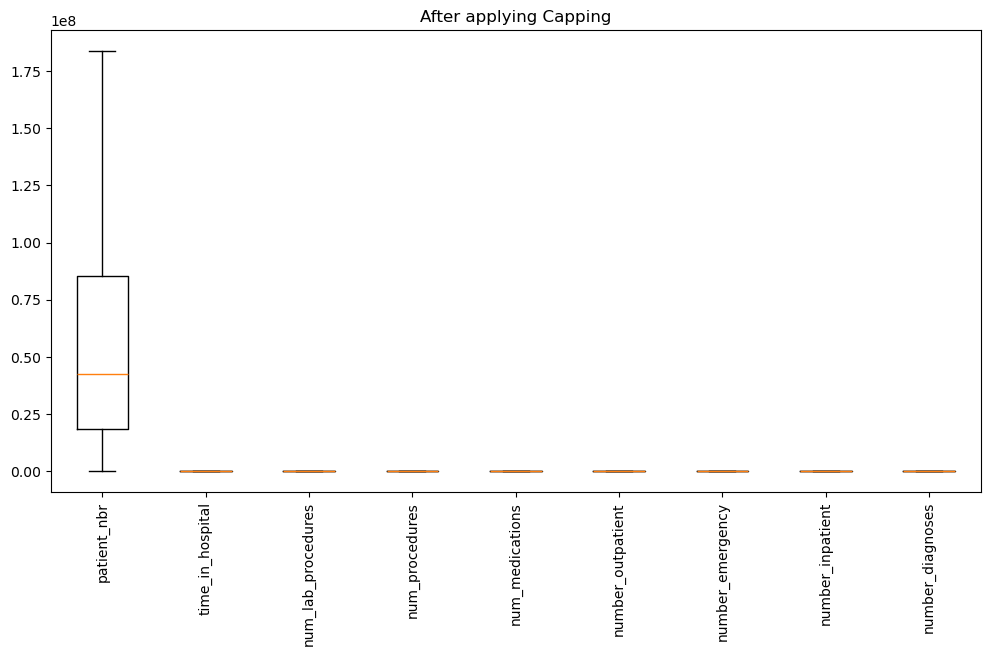

In [86]:
plt.figure(figsize=(12,6))
plt.boxplot([df[col].dropna().values for col in num_cols],labels=num_cols)
plt.xticks(rotation=90)
plt.title("After applying Capping")
plt.show()

### **⏬ Shape of the DataFrame :**

In [88]:
df.shape

(62535, 44)

## 💠<u>**Skewness**</u>💠
### Skewness tells us how ***balanced or imbalanced*** our data distribution is. *Symmetrical data* is balanced on both sides, which means values are evenly distributed on both sides of the center. However, in many datasets, values often lean ***left or right*** which creates skewness.



- ### ***Zero Skewness (Normal Distribution)***: Data is evenly spread, forming a bell-shaped curve.
- ### ***Positive Skew (Right-Skewed)***: The right tail is longer, meaning most values are clustered on the left, but a few extreme values pull the mean to the right.
- ### ***Negative Skew (Left-Skewed)***: The left tail is longer, meaning most values are on the right, but a few very low values pull the mean to the left.

### **⏬ Checking Skewness of Numeric Columns :**

In [91]:
df[num_cols].skew()

patient_nbr           0.573162
time_in_hospital      0.682061
num_lab_procedures   -0.325650
num_procedures        1.248127
num_medications       0.393782
number_outpatient     0.000000
number_emergency      0.000000
number_inpatient      0.000000
number_diagnoses     -0.682287
dtype: float64

- ### **0** - *Symmetrical* (Normal Distribution)
- ### **> 0** - *Right-Skewed* (Positive Skew)
- ### **< 0** - *Left-Skewed* (Negative Skew)

## 🔹 Understanding the Skewness Values :
- ### **Skewness = 0** - Data is symmetrical (normal distribution)
- ### **Skewness > 1 or < -1** - Data is highly skewed (needs transformation)
- ### **Moderate Skewness (-1 to -0.5 or 0.5 to 1)** - May or may not need transformation

### **⏬ Visualizing Skewness of Numeric Columns :**

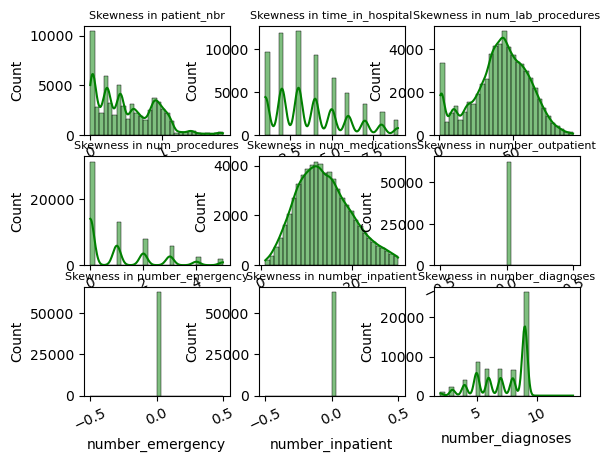

<Figure size 1800x500 with 0 Axes>

In [95]:
num_plots=len(num_cols)      #calculating how many numerical columns exist in the dataset and determining how many histograms (plots) need to be created.
cols=3                                                                 #setting fixed number of columns(visual structure is consistent and easy to read).
rows=math.ceil(num_plots/cols)                                  #calculating the number of rows required for subplots.
                                                                #"num_plots / cols" calculates how many rows are needed for the given number of columns,
                                                                #"math.ceil()" rounds up to the nearest whole number.

for i, col in enumerate(num_cols,1):                           #looping through each numerical column in num_cols, with i as the index (starting from 1).
                                                               #so,it allows us to create multiple histograms dynamically,
                                                               #so,no need to manually write separate plot commands for each column.
    plt.subplot(rows,cols,i)                                   #creating subplots.
    sns.histplot(df[col],bins=30,kde=True,color="green")
    plt.title(f"Skewness in {col}", fontsize=8)
    plt.xticks(rotation=25)                                    #it rotates x-axis labels by 25 degrees(for readability).
plt.figure(figsize=(18,5))
plt.tight_layout()
plt.show()

## 💠<u>**Handling Skewness**</u>💠
### When data is too skewed, it can mess up analysis and affect model performance.
### **🔹To fix skewness :**
### 1) ***Log Transformation***: For highly right-skewed data.
### 2) ***Square Root Transformation***: For moderately right-skewed data.
### 3) ***Cube Root Transformation***: For extremely skewed data (both directions).
### 4) ***Box-Cox Transformation***: For data that isn’t strictly positive-skewed.
### 5) ***Capping Outliers(Winsorization)***: For data with extreme outliers.

### **⏬ Identifying Highly Skewed Numeric Columns :**

In [98]:
skewed_cols=df[num_cols].skew()   #calcuating skewness for numerical columns.
skewed_cols=skewed_cols[abs(skewed_cols)>0.5]  #filtering highly skewed columns.
print(skewed_cols)

patient_nbr         0.573162
time_in_hospital    0.682061
num_procedures      1.248127
number_diagnoses   -0.682287
dtype: float64


### **⏬ Fixing Skewness Using <u>Cube Root Transformation</u> :**

In [100]:
for col in skewed_cols.index: #looping goes through each column name one by one and "skewed_cols.index" contains the names of highly skewed columns.
        df[col]=np.cbrt(df[col]) #cube root for negative values.

print(df[skewed_cols.index].skew())

patient_nbr        -0.549489
time_in_hospital    0.001869
num_procedures      0.209260
number_diagnoses   -1.037102
dtype: float64


### **🟢 Improvements After Transformation:**
### ***time_in_hospital*** reduced from **0.682061** to **0.001869**.
### ***num_procedures*** reduced from **1.248127** to **0.209260**.

### **⏬ Visualizing Numeric Columns After Fixing Skewness:**

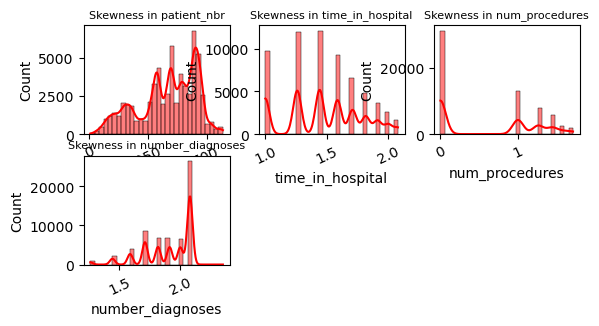

<Figure size 1800x500 with 0 Axes>

In [103]:
for i, col in enumerate(skewed_cols.index,1): #looping through each numerical column in num_cols, with i as the index (starting from 1).
    plt.subplot(rows,cols,i)  #creating subplots.
    sns.histplot(df[col],bins=30,kde=True,color="Red")
    plt.title(f"Skewness in {col}", fontsize=8)
    plt.xticks(rotation=25) #it rotates x-axis labels by 25 degrees(for readability).
plt.figure(figsize=(18,5))
plt.tight_layout()
plt.show()

In [104]:
df.shape

(62535, 44)

### 🔴 **Description :**
### Looking at the ***histograms*** and ***KDE plots***, some features still showing skewness, such as ***patient_nbr*** and ***number_diagnoses***.

### **⏬ Applying Yeo-Johnson Transformation :**

In [107]:
#list of columns to apply PowerTransformer:
cols = ['patient_nbr', 'number_diagnoses']

#initializing PowerTransformer using Yeo-Johnson:
pt = PowerTransformer(method='yeo-johnson')              #Yeo-Johnson handles both positive and negative values.

#applying transformation and assign back to the original columns:
df[cols] = pt.fit_transform(df[cols])

#checking skewness after transformation:
print(df[cols].skew())

patient_nbr        -0.279971
number_diagnoses   -0.338669
dtype: float64


### 🟢 Improvements After Latest Transformation:
- ### ***patient_nbr*** is reduced to **-0.279971**, which is in acceptable range.
- ### ***number_diagnoses*** is reduced to **-0.338669**, which is also in acceptable range.

### **⏬ Updated Skewness of Numeric Columns :**

In [110]:
updated_skewness = df.select_dtypes(include=['number']).skew()
print(updated_skewness)

patient_nbr          -0.279971
time_in_hospital      0.001869
num_lab_procedures   -0.325650
num_procedures        0.209260
num_medications       0.393782
number_outpatient     0.000000
number_emergency      0.000000
number_inpatient      0.000000
number_diagnoses     -0.338669
dtype: float64


### **⏬ Bar Plot of Skewness After Transformation :**

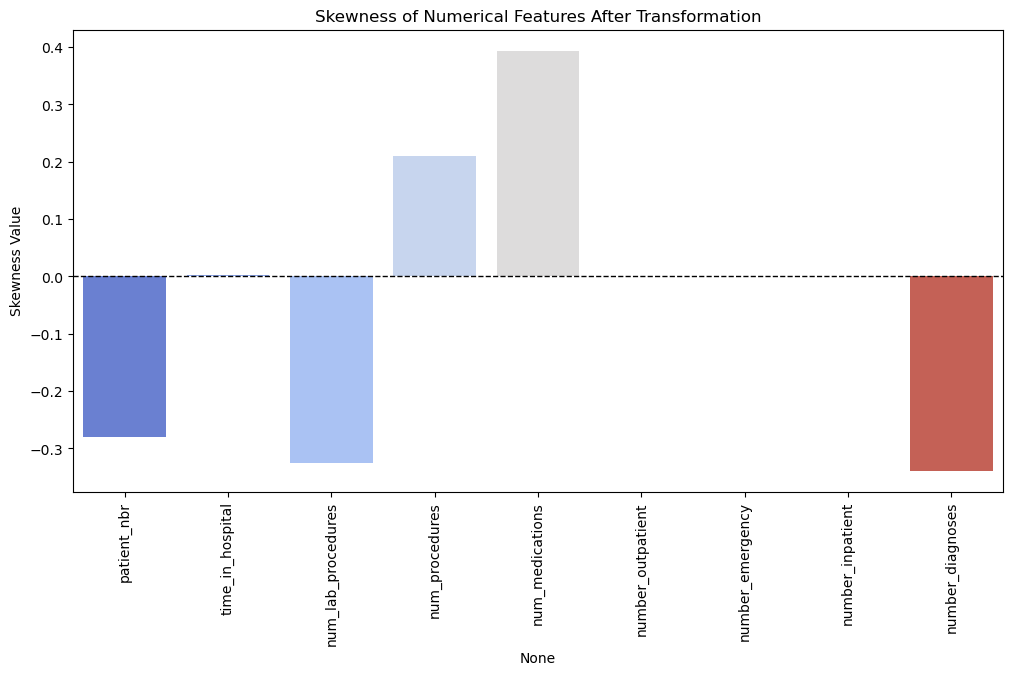

In [112]:
#convert Series to DataFrame for visualization:
df_skewness = pd.DataFrame(updated_skewness, columns=['Skewness'])

#visualising all nuerical columns:
plt.figure(figsize=(12,6))
sns.barplot(x=df_skewness.index,y=df_skewness['Skewness'],hue=df_skewness.index,palette='coolwarm',legend=False)
plt.xticks(rotation=90)
plt.axhline(0,color='black',linestyle='dashed',linewidth=1)
plt.title("Skewness of Numerical Features After Transformation")
plt.ylabel("Skewness Value")
plt.show()

In [113]:
df.shape #checking shape after skewness.

(62535, 44)

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **3) <u>Exploratory Data Analysis</u> (EDA) :**

### **It helps to understand the structure, patterns, and potential issues within the dataset before building and training models. EDA ensures that the data is clean, meaningful, and ready for modeling, which ultimately improves model performance and accuracy**


## ⭐ ***<u>Data Distribution (Univariate Analysis)</u> :***

## 🔸 **<u>Histogram</u>**

- ### Represents the distribution of a single numerical variable using bars.
- ### Helps understand frequency and spread of data.

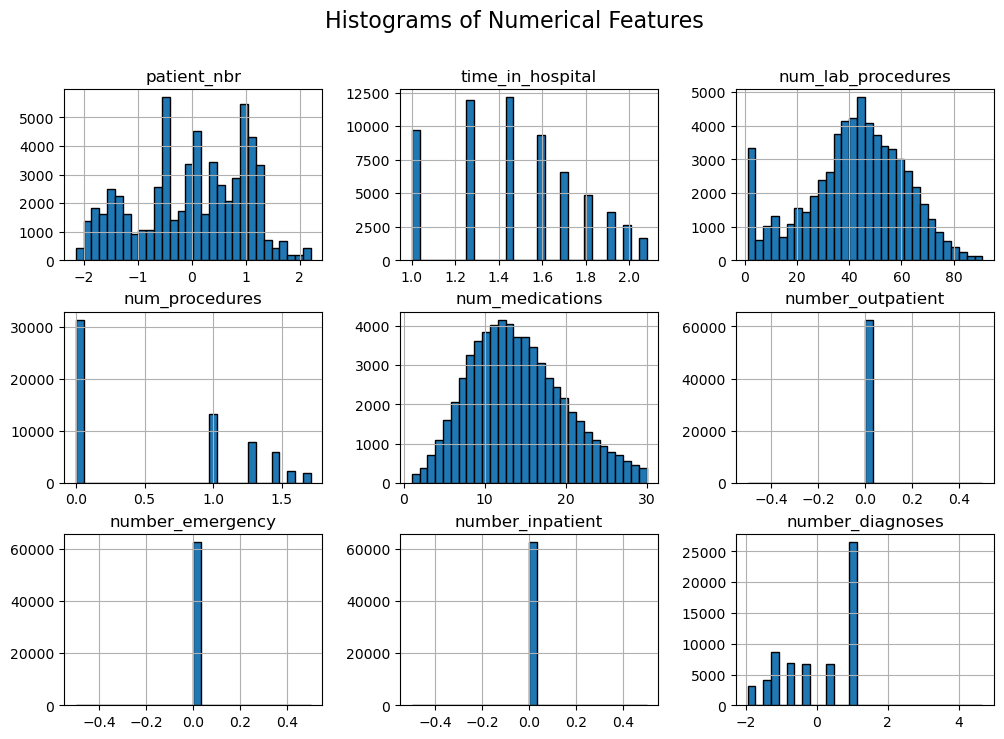

In [120]:
df.hist(figsize=(12,8),bins=30,edgecolor='black')
plt.suptitle("Histograms of Numerical Features",fontsize=16)
plt.show()

## 🔸 <u>**Kernel Density Estimation (KDE)**</u>

- ### Smooth representation of a variable’s probability distribution.
- ### Alternative to histograms but without bar divisions.

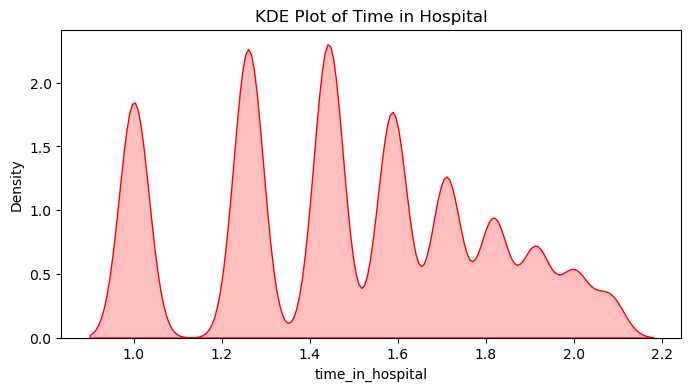

In [123]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['time_in_hospital'],fill=True,color='red')
plt.title("KDE Plot of Time in Hospital")
plt.show()

## 🔸 <u>**Boxplot**</u>

- ### Displays the distribution, median, quartiles, and outliers of a numerical variable.
- ### Useful for detecting skewness and outliers.

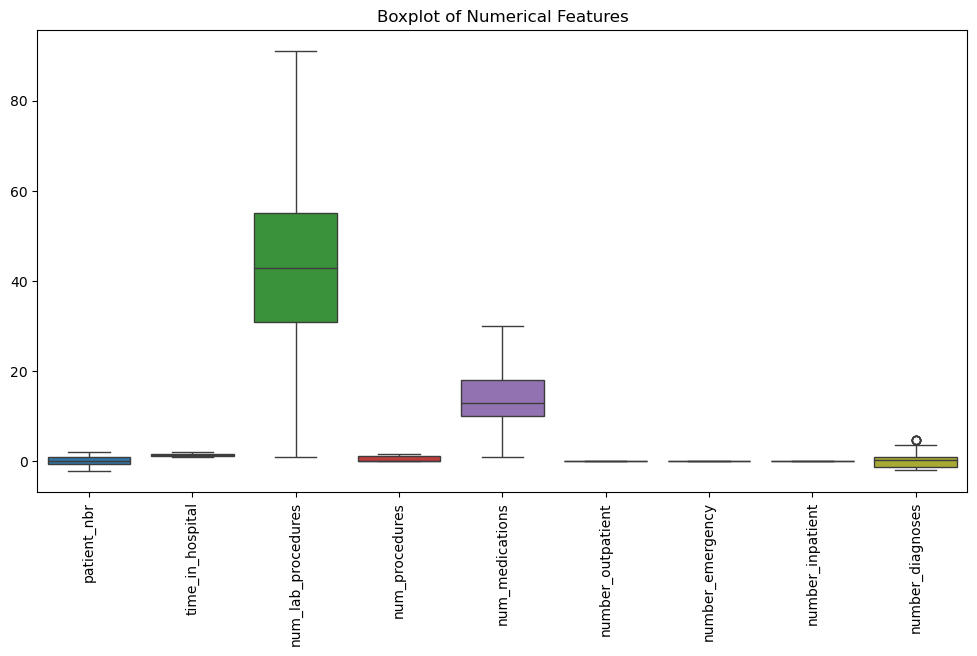

In [126]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  #rotate feature names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

## ⭐ ***<u>Relationships Between Variables (Bivariate Analysis)</u> :***

## 🔸 <u>**Pair Plot**</u>

- ### Shows scatter plots for pairwise relationships between numerical variables.
- ### Diagonal can have histograms or KDE plots for individual variable distribution.

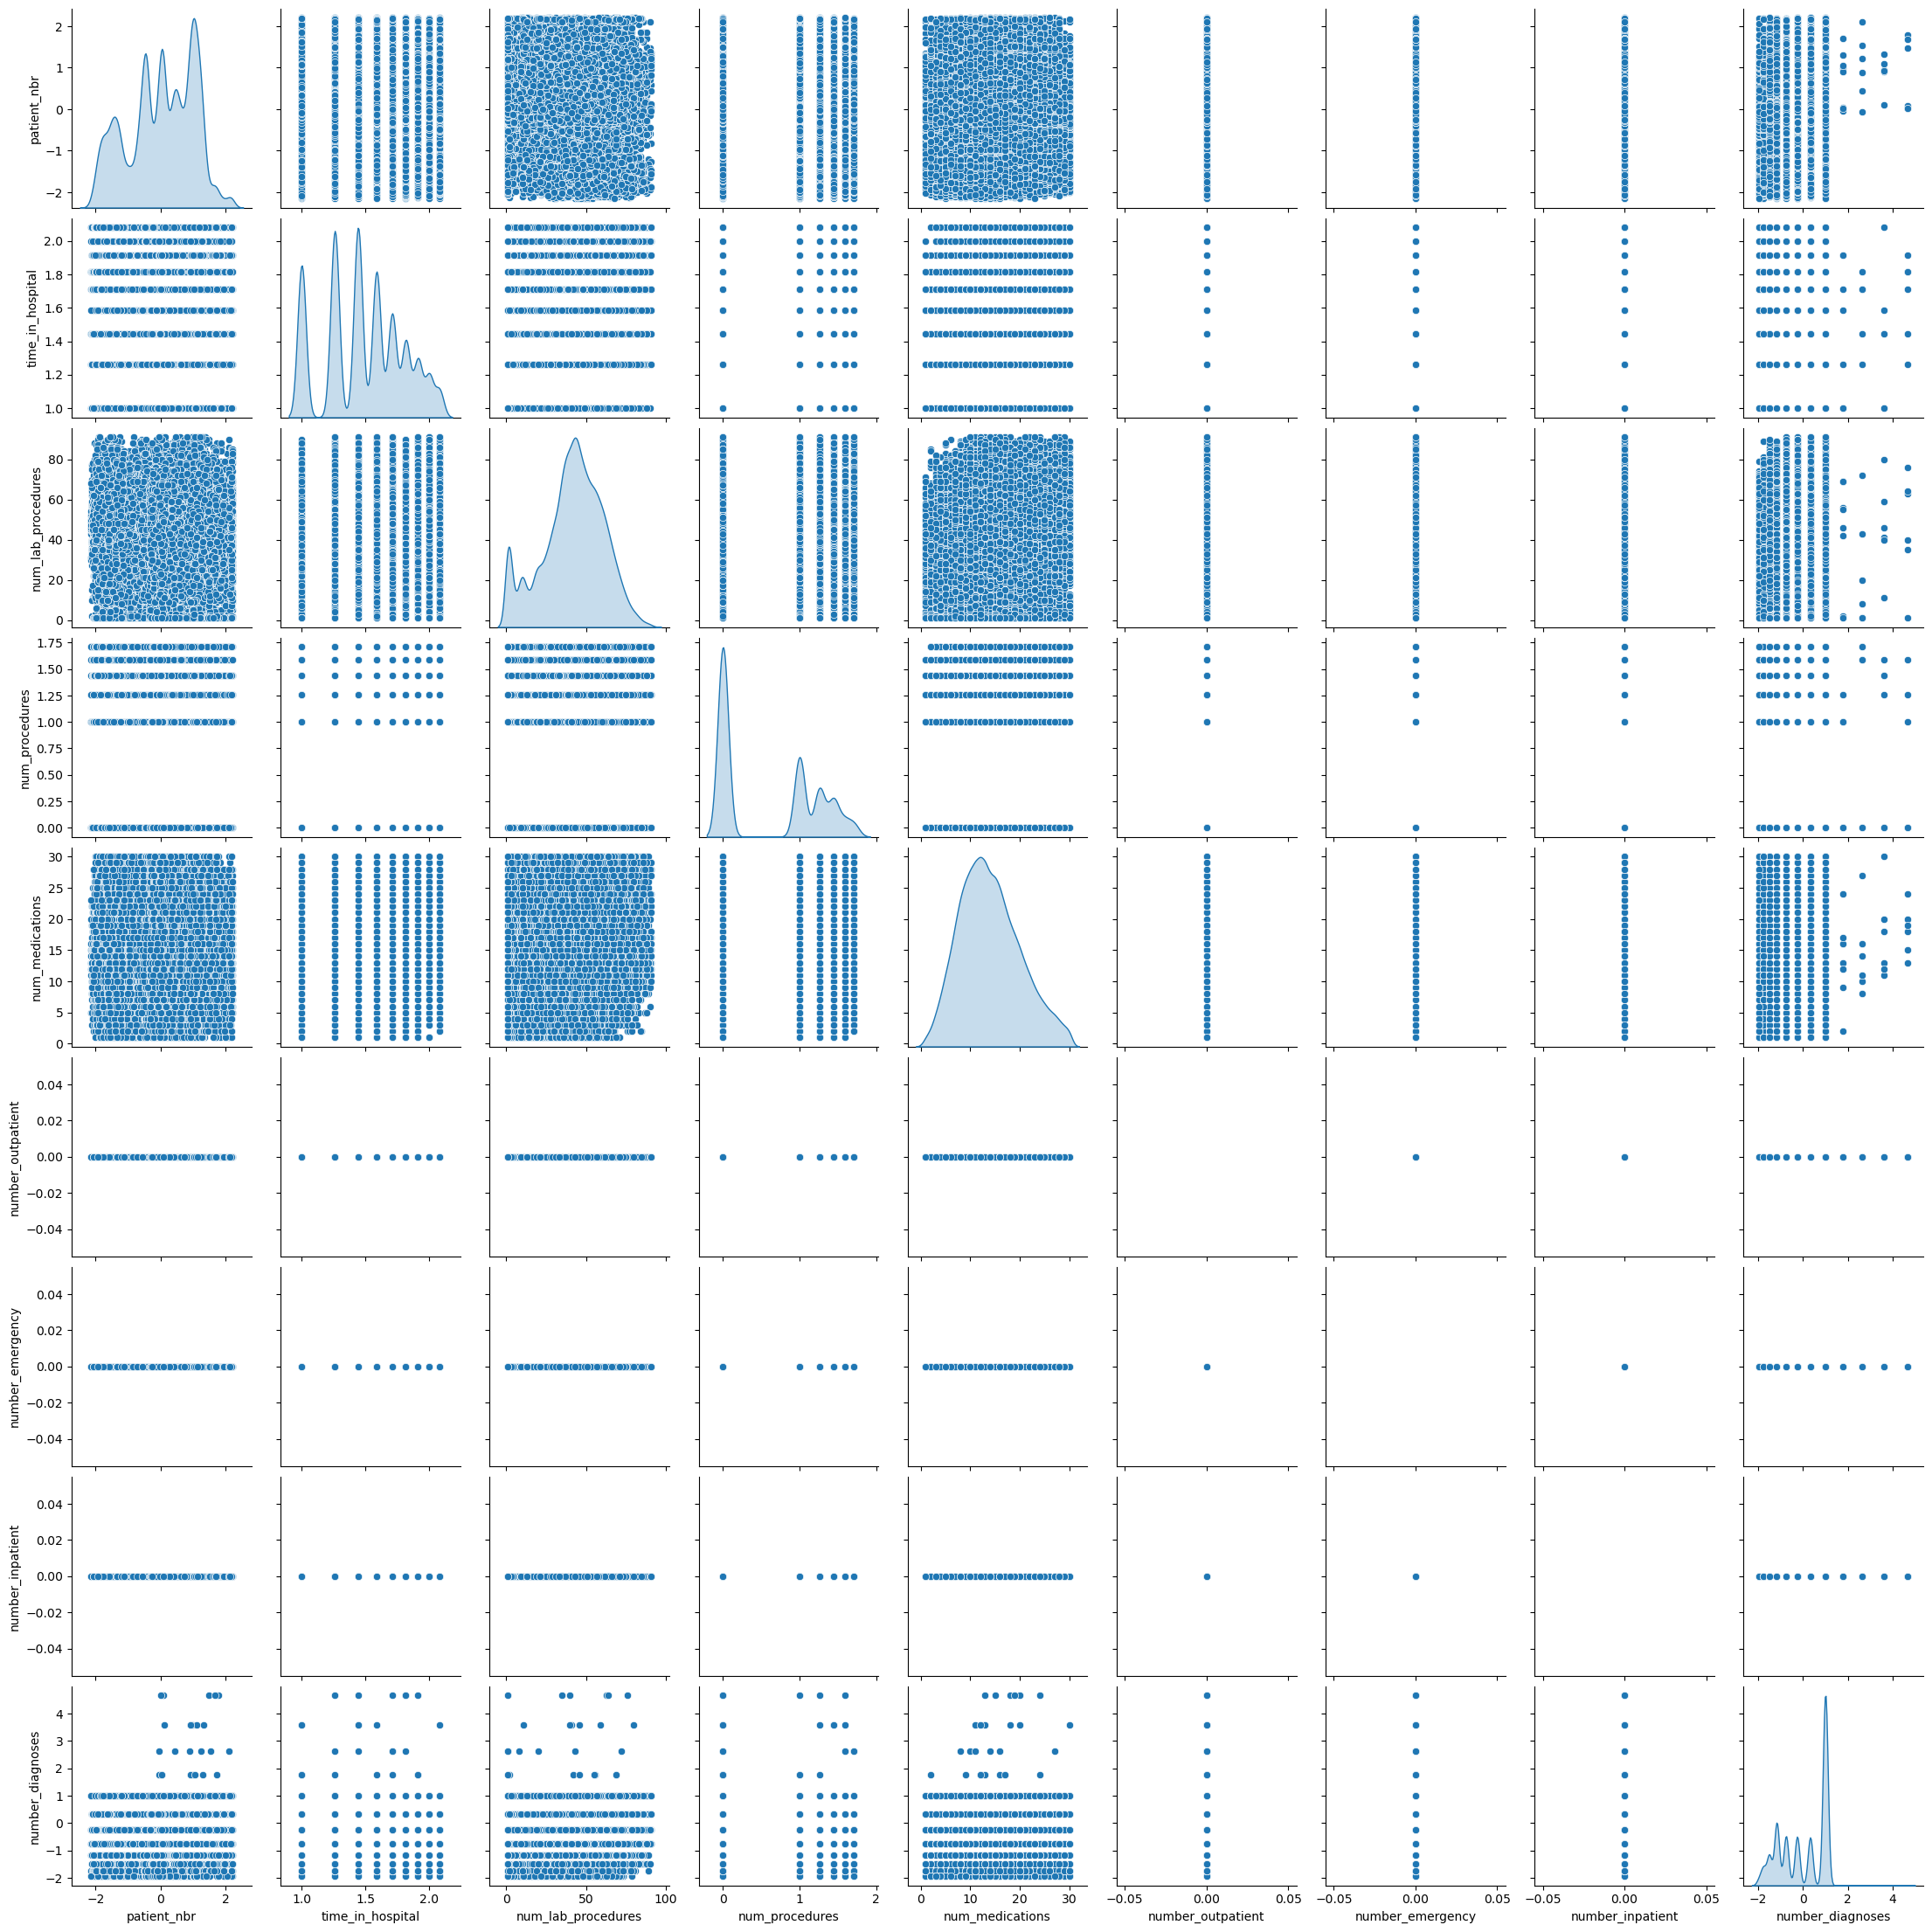

In [130]:
sns.pairplot(df, diag_kind='kde')  #KDE for better visualization.
plt.show()                         #pair plot for visualizing relationships:

## 🔸 <u>**Heatmap**</u>

- ### Visualizes correlation between numerical features using a color-coded grid.
- ### Helps identify strongly related variables for feature selection.

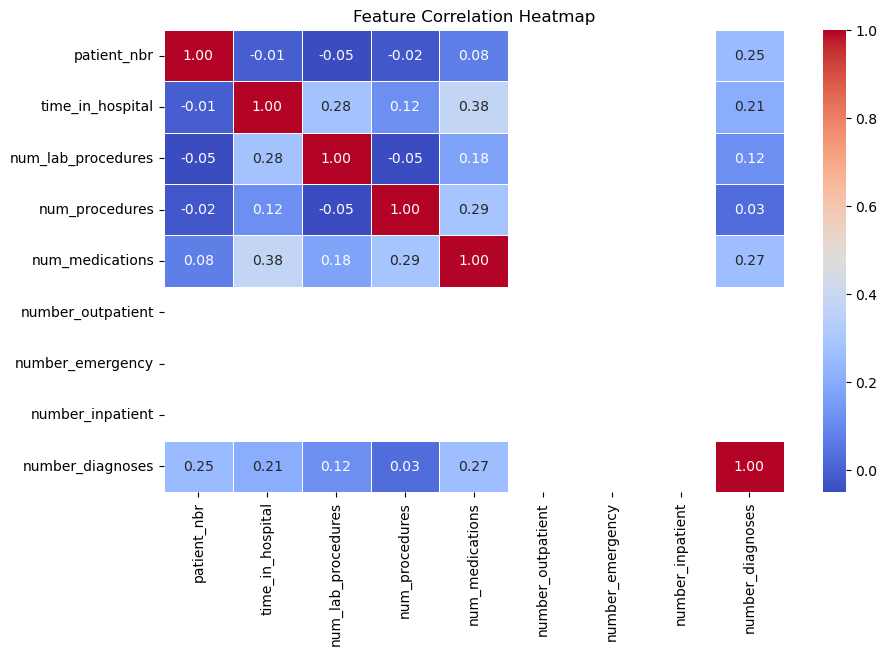

In [133]:
#computing correlation matrix:
corr_matrix=df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## 🔸 <u>**Bar Plot**</u>

- ### Displays categorical data with bars, where the height represents frequency or values.
- ### Used for comparing categories.

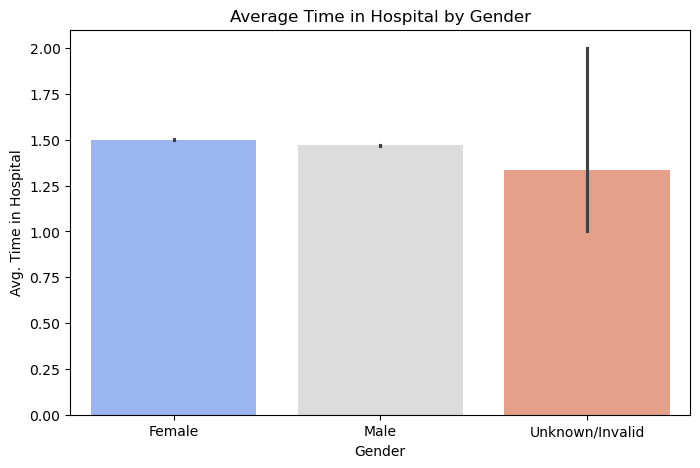

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='gender',y='time_in_hospital',hue='gender',estimator=np.mean,palette='coolwarm')
plt.title("Average Time in Hospital by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Time in Hospital")
plt.show()

## ⭐ <u>***Categorical Data Analysis</u> :***

## 🔸 <u>**Count Plot**</u>

- ### Similar to a bar plot, but specifically counts occurrences of each categorical variable.
- ### Useful for categorical feature analysis.

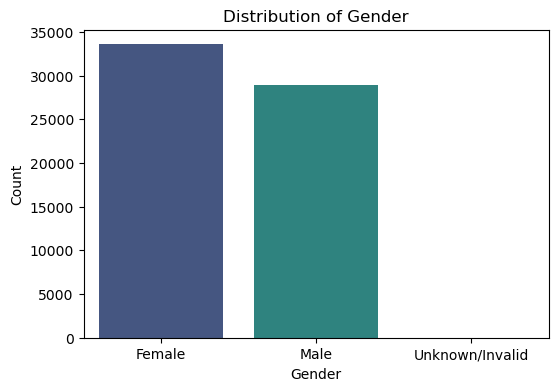

In [140]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='gender',hue='gender',palette='viridis',legend=False)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## 🔸 <u>**Pie Chart**</u>

- ### Represents categorical data proportions as slices of a circle.
- ### Best for percentage-based comparisons.

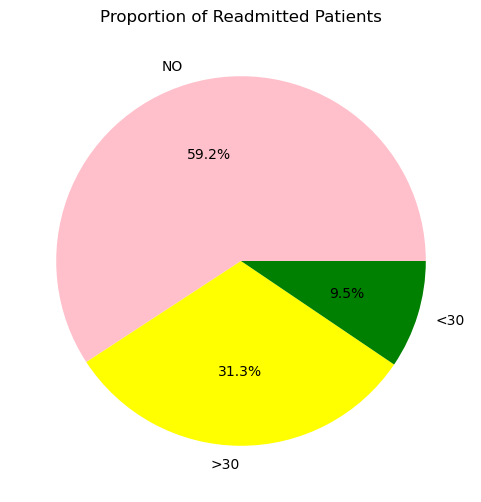

In [143]:
#categorical column: 'readmitted' (Yes/No):
df['readmitted'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6),colors=['pink','yellow','green'])
plt.title("Proportion of Readmitted Patients")
plt.ylabel("")
plt.show()

## ⭐ <u>***Identifying Trends & Patterns</u> :***

## 🔸 <u>**Line Plot**</u>

- ### Connects data points with lines, showing trends over time or continuous variables.
- ### Common in time series analysis.

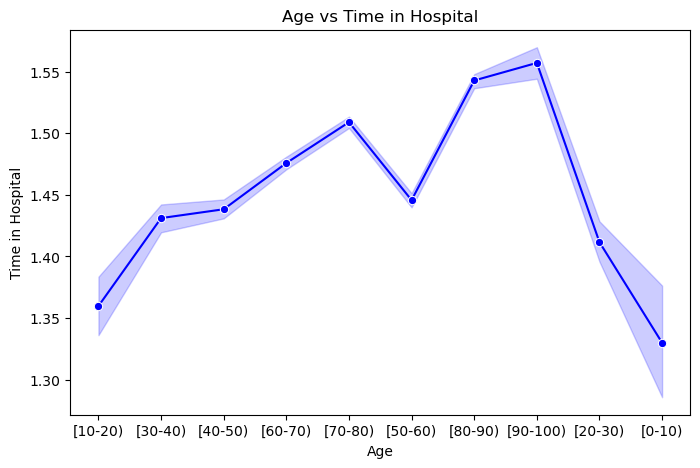

In [147]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['age'],y=df['time_in_hospital'],marker='o',color='blue')
plt.title("Age vs Time in Hospital")
plt.xlabel("Age")
plt.ylabel("Time in Hospital")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **4) <u>Feature Engineering</u> :**

### Feature Engineering (<i>Encoding Categorical Features</i>) helps convert categorical variables into a numerical format, so that machine learning models can understand.

### 💠 Different techniques are as follows:
#### ***1) Label Encoding*** - Ordered categories
#### ***2) One-Hot Encoding*** - Small categorical sets

### Here I'm using **Label Encoding**.

### ⏬ **Encoding using <u>Label Encoding</u> :**

In [154]:

#identifying categorical columns:
categorical_cols=df.select_dtypes(include=['object']).columns

#applying Label Encoding to all categorical columns:
encoder=LabelEncoder()
for col in categorical_cols:                        #looping through each column in categorical_cols.
    df[col]=encoder.fit_transform(df[col])

print(df.head())

   patient_nbr  race  gender  age  weight  time_in_hospital  payer_code  \
1     0.349996     3       0    1       1          1.442250           0   
3     0.851194     3       1    3       1          1.259921           0   
4     0.056526     3       1    4       1          1.000000           0   
6     0.881739     3       1    6       1          1.587401           0   
7     1.351124     3       1    7       1          1.709976           0   

   medical_specialty  num_lab_procedures  num_procedures  ...  citoglipton  \
1                  0                  59             0.0  ...            0   
3                  0                  44             1.0  ...            0   
4                  0                  51             0.0  ...            0   
6                  0                  70             1.0  ...            0   
7                  0                  73             0.0  ...            0   

   insulin  glyburide-metformin  glipizide-metformin  \
1        3              

In [155]:
df.shape

(62535, 44)

---

# **5) <u>Feature Selection</u> :**

### Feature Selection is picking the most important features. Before training a model, it's important to select the most relevant features.

### **⏬ Correlation Matrix of Numeric Columns :**

In [160]:
#selecting only numeric columns:
numerical_data=df.select_dtypes(include=['float64','int64'])

#calculating correlation matrix:
correlation_matrix=numerical_data.corr()

correlation_matrix

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
patient_nbr,1.000000,-0.007956,-0.049377,-0.021968,0.075321,NaN,NaN,NaN,0.249922
time_in_hospital,-0.007956,1.000000,0.279540,0.116548,0.379813,NaN,NaN,NaN,0.205496
num_lab_procedures,-0.049377,0.279540,1.000000,-0.049178,0.175411,NaN,NaN,NaN,0.115868
num_procedures,-0.021968,0.116548,-0.049178,1.000000,0.288292,NaN,NaN,NaN,0.029432
num_medications,0.075321,0.379813,0.175411,0.288292,1.000000,NaN,NaN,NaN,0.265751
number_outpatient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_emergency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_inpatient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_diagnoses,0.249922,0.205496,0.115868,0.029432,0.265751,NaN,NaN,NaN,1.000000


### **⏬ Heatmap of Correlation Matrix :**

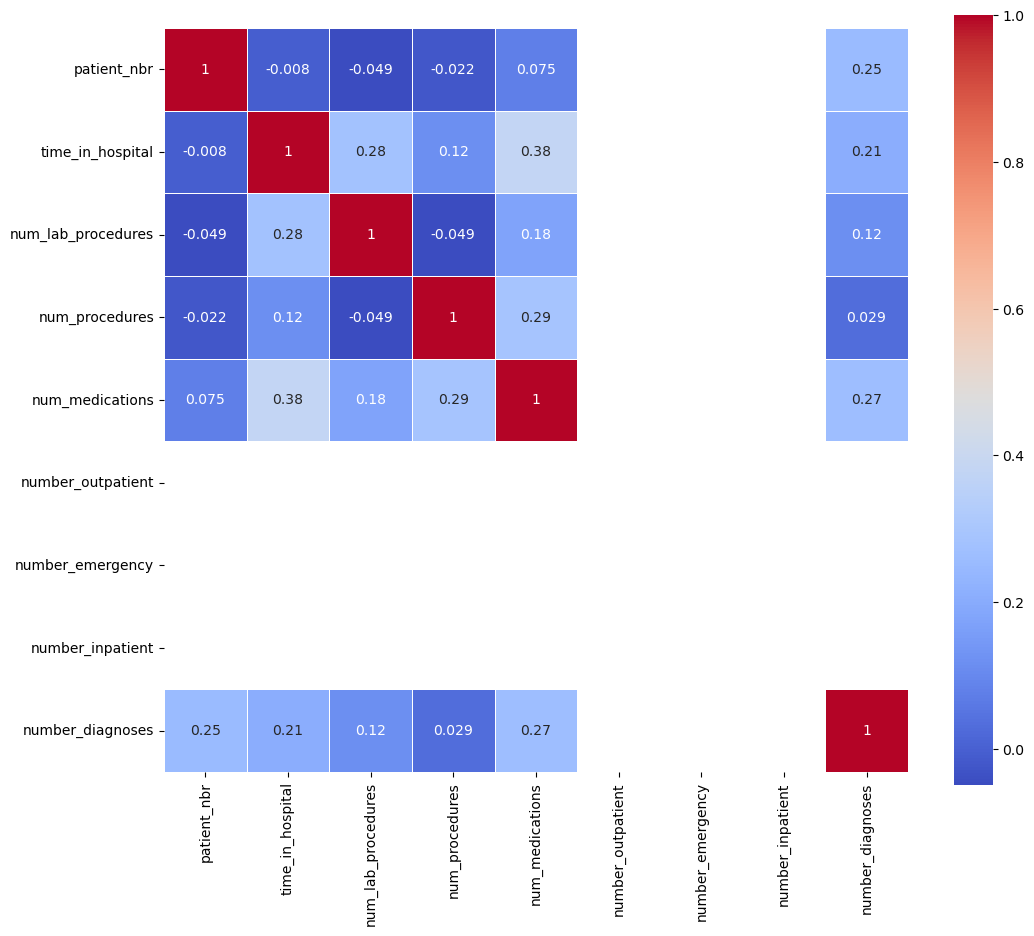

In [162]:
plt.figure(figsize=(12,10)) #adjusting figure size as needed
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True,linewidth=.5,annot_kws={"size":10})
plt.show()

### Here I'm using **SelectKbest-Filter Method**.

### **<u>SelectKbest-Fiter Method</u> :**

In [165]:
#identifying categorical and numerical columns correctly:
cat_cols=df.select_dtypes(include=['int','int64']).columns  #encoded categorical features
num_cols=df.select_dtypes(include=['float','float64']).columns  #numerical features
y=df['readmitted']  #target variable

#filtering of constant columns:
X_cat=df[cat_cols].loc[:,df[cat_cols].nunique()>1]
X_num=df[num_cols].loc[:,df[num_cols].nunique()>1]

#scaling numerical features for ANOVA:
X_num_scaled=StandardScaler().fit_transform(X_num)

#setting k value : the number of top features to select based on their importance or relevance to the target variable.
k=8
k_cat=min(k,X_cat.shape[1])
k_num=min(k,X_num.shape[1])

#applying Chi-Squared for categorical features:
chi_selector=SelectKBest(chi2,k=k_cat)
chi_selected=chi_selector.fit(X_cat,y).get_support()
selected_cat_features=list(X_cat.columns[chi_selected])

#applying ANOVA F-test for numerical features:
anova_selector=SelectKBest(f_classif,k=k_num)
anova_selected=anova_selector.fit(X_num_scaled,y).get_support()
selected_num_features=list(X_num.columns[anova_selected])

# Print selected features
print("Selected Categorical Features:",selected_cat_features)
print("Selected Numerical Features:",selected_num_features)

Selected Categorical Features: ['age', 'medical_specialty', 'num_lab_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 'readmitted']
Selected Numerical Features: ['patient_nbr', 'time_in_hospital', 'num_procedures', 'number_diagnoses']


### 🟢 **Selected Categorical Features are** :
### **1) age** – Patient age is a key factor in predicting health outcomes. Older patients are more prone to complications and may have higher readmission risks.
### **2) medical_specialty** – The type of medical specialty treating the patient can affect readmission rates.
### **3) num_lab_procedures** - High or low lab procedures counts can reflect the severity of the patient's condition.
### **4) diag_1,**
### **5) diag_2,**
### **6) diag_3** - Primary, secondary, and tertiary diagnoses. Multiple diagnoses increase the complexity of treatment and may elevate readmission chances.
### **7) num_medications** - A higher number of medications can indicate complex health issue.
### **8) readmitted** - Previous readmissions are strong indicators of future readmissions (patients with a history of readmission are more likely to be readmitted).

### 🟢 **Selected Numerical Features are** :
### **1) patient_nbr** – May not directly influence readmission but can help track patient-specific trends.
### **2) time_in_hospital** – Longer hospital stays could mean more severe conditions, increasing the chances of readmission.
### **3) num_procedures** – More procedures could reflect the severity of the disease or complications during treatment.
### **4) number_diagnoses** – Higher number of diagnoses reflects a complex medical history, which increases the likelihood of future complications and readmission.

In [168]:
df.shape

(62535, 44)

In [169]:
print(df['readmitted'].value_counts())

readmitted
2    37029
1    19589
0     5917
Name: count, dtype: int64


### **⏬ Handling Class Imbalance using Random OverSampling :**

In [171]:
#seperating features and target
X=df.drop('readmitted',axis=1)
Y=df['readmitted']
from imblearn.over_sampling import RandomOverSampler

#Applying random over sammpling
ros=RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)

#creating new dataset with resampled data
df_new=pd.concat([X_resampled, Y_resampled], axis=1)

C:\Users\suvid\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\suvid\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [172]:
df_new.shape

(111087, 44)

In [173]:
print(df_new['readmitted'].value_counts())

readmitted
1    37029
2    37029
0    37029
Name: count, dtype: int64


---

# **6) <u>Split Data into Training and Testing Sets</u> :**

### Data splitting means dividing the dataset into two parts:
### **1) Training Set** – Used to train the model (learn patterns).
### **2) Test Set** – Used to check how well the model works on new data.

### It is needed :
### **1) To avoid overfitting** – If the model memorizes the training data, it might fail on new data.
### **2) To measure accuracy** – Helps to check how well the model will perform on unseen data.
### **3) To improve generalization** – Makes the model better at handling new cases.

#### For eg: Think of it like studying for an exam:
#### 1) **Training set** = Studying material,
#### 2) **Test set** = Exam questions

### **⏬ Splitting Data into Training and Testing Sets :**

In [180]:
#splitting data into training and testing sets (80% train, 20% test):
X=df_new.drop(columns=['readmitted'])  #features(everything except the target)
y=df_new['readmitted']  #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#printing the shape of train and test sets:
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (88869, 43) (88869,)
Testing Set Shape: (22218, 43) (22218,)


### **🟢 Training Set** : ***88869 rows*** and ***43 features*** (The model will learn patterns from this data).
### **🟢 Test Set** : ***22218 rows*** and ***43 features***  (The model will be tested on this data to measure its performance).
### **Balanced split** : Around 80% data for training and 20% data for testing ensures a good balance for learning and evaluation.

---

# **7) <u>Feature Scaling</u> :**

### Feature scaling is the process of adjusting the range of data values so that all features are on a similar scale.

### **Common Methods of Feature Scaling :**
### **1) Standardization** – Scales data to have a mean of 0 and standard deviation of 1.
 
### **2) Min-Max Scaling** – Scales data to a fixed range (usually 0 to 1).

### **⏬ Standardizing the Data Using StandardScaler :**

In [187]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  #apply the same transformation

### **⏬ Feature Importance using Random Forest :**

In [189]:
#feature Importance using Random Forest:
rmf=RandomForestClassifier(n_estimators=100,random_state=42)
rmf.fit(X_train_scaled,y_train)

#store feature importance:
feature_importances=pd.Series(rmf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_importances)

patient_nbr                 0.115627
num_lab_procedures          0.097400
diag_1                      0.094210
diag_2                      0.091453
diag_3                      0.089311
num_medications             0.082063
time_in_hospital            0.053012
age                         0.048441
medical_specialty           0.045889
number_diagnoses            0.042270
payer_code                  0.038807
num_procedures              0.037055
insulin                     0.026026
race                        0.024892
gender                      0.020579
metformin                   0.014299
glipizide                   0.012465
change                      0.012168
glyburide                   0.011750
pioglitazone                0.008183
rosiglitazone               0.007888
diabetesMed                 0.007873
glimepiride                 0.007338
weight                      0.004207
repaglinide                 0.002761
glyburide-metformin         0.001470
nateglinide                 0.001326
a

### **⏬ Top 20 Important Features (Random Forest) :**

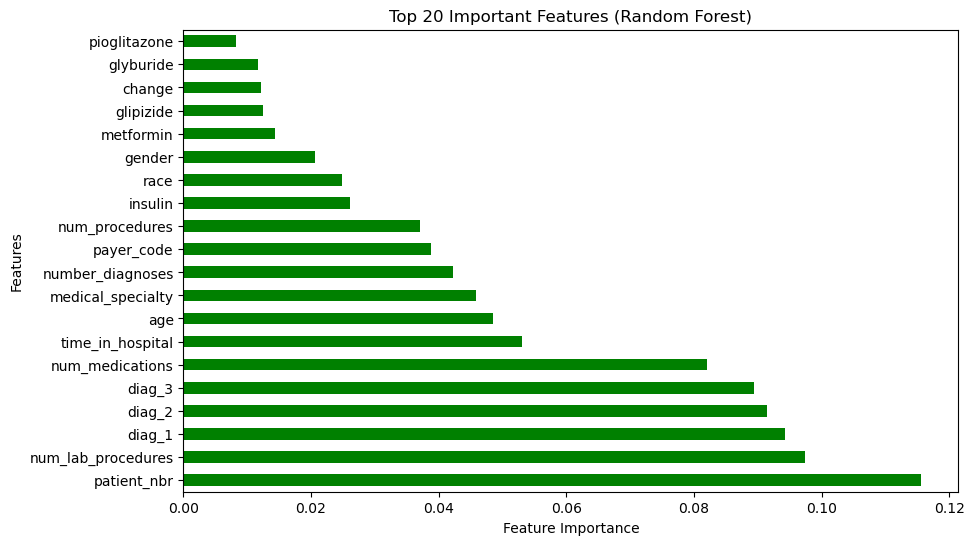

In [191]:
#plot feature importances:
feature_importances.head(20).plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Important Features (Random Forest)")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **8) <u>Build the ML Model</u>**

### When building a machine learning model, choosing the right algorithm is crucial. Each model has its own strengths and weaknesses depending on the data and the problem at hand.**

## **1. Classification Algorithms**
### Classification algorithms are used when ***the target variable is categorical*** (e.g., spam or not spam, disease or no disease). They predict discrete class labels.
- #### ( Logistic Regression, SVM, Decision Tree, MLP Classifier, Naive Bayes, Random Forest, K-Nearest Neighbors, Gradient Boost, Adaboost)
- ### Performance Metrics- Accuracy, Precision, Recall, F1-score

## **2. Regression Algorithms**
### Regression algorithms are used when ***the target variable is continuous*** (e.g., predicting house prices, sales, or temperatures).
- #### (SVR, MLP Regressor, Random Forest Regressor, Linear Regression, Gradient Boost, Adaboost)
- ### Performance Metrics- RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), R² (R-squared)

## The project involves predicting patient readmission, the target variable is categorical (eg- ***"NO"***, ***">30"***, ***"<30"***). This makes it a ***classification*** problem rather than regression.

---

### **⏬ Train Models :**

In [200]:
#initializing models:
models = {               #creating a dictionary called models. It allows easy iteration through models instead of writing separate code for each model.
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "KNN":KNeighborsClassifier()
}

#training models:
for name,model in models.items():                                                                       #iterating through each model in the dictionary.
    model.fit(X_train,y_train)
    print(f"{name} trained successfully!")

Decision Tree trained successfully!
Random Forest trained successfully!
Gradient Boosting trained successfully!
KNN trained successfully!


# **9) <u>Model Evaluation</u> :**

In [202]:
#testing and evaluating models:
print("\n Evaluating models...\n")                            #indicating that the model evaluation process has started.
results=[]                                                    #creating an empty list called results, which will store evaluation scores for each model.

for name, model in models.items():                   #looping through each model(name : stores the model name, model : stores the trained model itself).
    y_pred=model.predict(X_test)                     #using the trained model to predict values for X_test(y_pred stores these predicted values).
    accuracy=accuracy_score(y_test,y_pred)                       #comparing y_pred(predictions) with y_test(actual) and
                                                                 #calculating the accuracy(percentage of correct predictions).
    report=classification_report(y_test,y_pred,zero_division=1,output_dict=True)     #creating classification report as a dictionary dictionary format,
                                                                                     #so that we can access specific metrics.

    #storing key metrics:
    results.append([
        name,
        accuracy,
        report["macro avg"]["precision"],
        report["weighted avg"]["precision"],
        report["macro avg"]["recall"],
        report["weighted avg"]["recall"],
        report["macro avg"]["f1-score"],
        report["weighted avg"]["f1-score"]
    ])

    #printing detailed classification report for immediate insights:
    print(f"\n{name} Performance:")                                                                                     #printing the model perforance.
    print(f"Accuracy: {accuracy:.4f}")                                                #calculating the accuracy score of the model.
                                                                                      #(:.4f) printing the accuracy score, rounded to 4 decimal places.
    print(classification_report(y_test,y_pred,zero_division=1))          #printing a detailed classification report(Precision,Recall,F1-score,Support).


 Evaluating models...


Decision Tree Performance:
Accuracy: 0.8296
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      7406
           1       0.74      0.92      0.82      7406
           2       0.90      0.57      0.70      7406

    accuracy                           0.83     22218
   macro avg       0.84      0.83      0.82     22218
weighted avg       0.84      0.83      0.82     22218


Random Forest Performance:
Accuracy: 0.8927
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7406
           1       0.80      0.92      0.85      7406
           2       0.90      0.76      0.83      7406

    accuracy                           0.89     22218
   macro avg       0.90      0.89      0.89     22218
weighted avg       0.90      0.89      0.89     22218


Gradient Boosting Performance:
Accuracy: 0.4663
              precision    recall  f1-score   support

           0       0

### **⏬ Model Performance Summary :**

In [204]:
#creating a DataFrame for better visualization and storage:
df_results=pd.DataFrame(results, columns=[                                             #creating a DataFrame from the results list using pd.DataFrame().
    "Model",                                                                           #defining column names.
    "Accuracy",
    "Macro Avg Precision", "Weighted Avg Precision",
    "Macro Avg Recall", "Weighted Avg Recall",
    "Macro Avg F1-Score", "Weighted Avg F1-Score"
])
df_results

,Model,Accuracy,Macro Avg Precision,Weighted Avg Precision,Macro Avg Recall,Weighted Avg Recall,Macro Avg F1-Score,Weighted Avg F1-Score
0,Decision Tree,0.829553,0.842912,0.842912,0.829553,0.829553,0.819687,0.819687
1,Random Forest,0.892700,0.898105,0.898105,0.892700,0.892700,0.891948,0.891948
2,Gradient Boosting,0.466334,0.467265,0.467265,0.466334,0.466334,0.466397,0.466397
3,KNN,0.651634,0.648076,0.648076,0.651634,0.651634,0.629582,0.629582


- ### Macro Average → It treats all classes equally, no matter how many examples each class has. It finds the average by giving each class the same importance.

- ### Weighted Average → It considers class imbalance, meaning it gives more importance to classes that have more samples in the dataset.

### **⏬ Confusion Matrix for Model Predictions :**

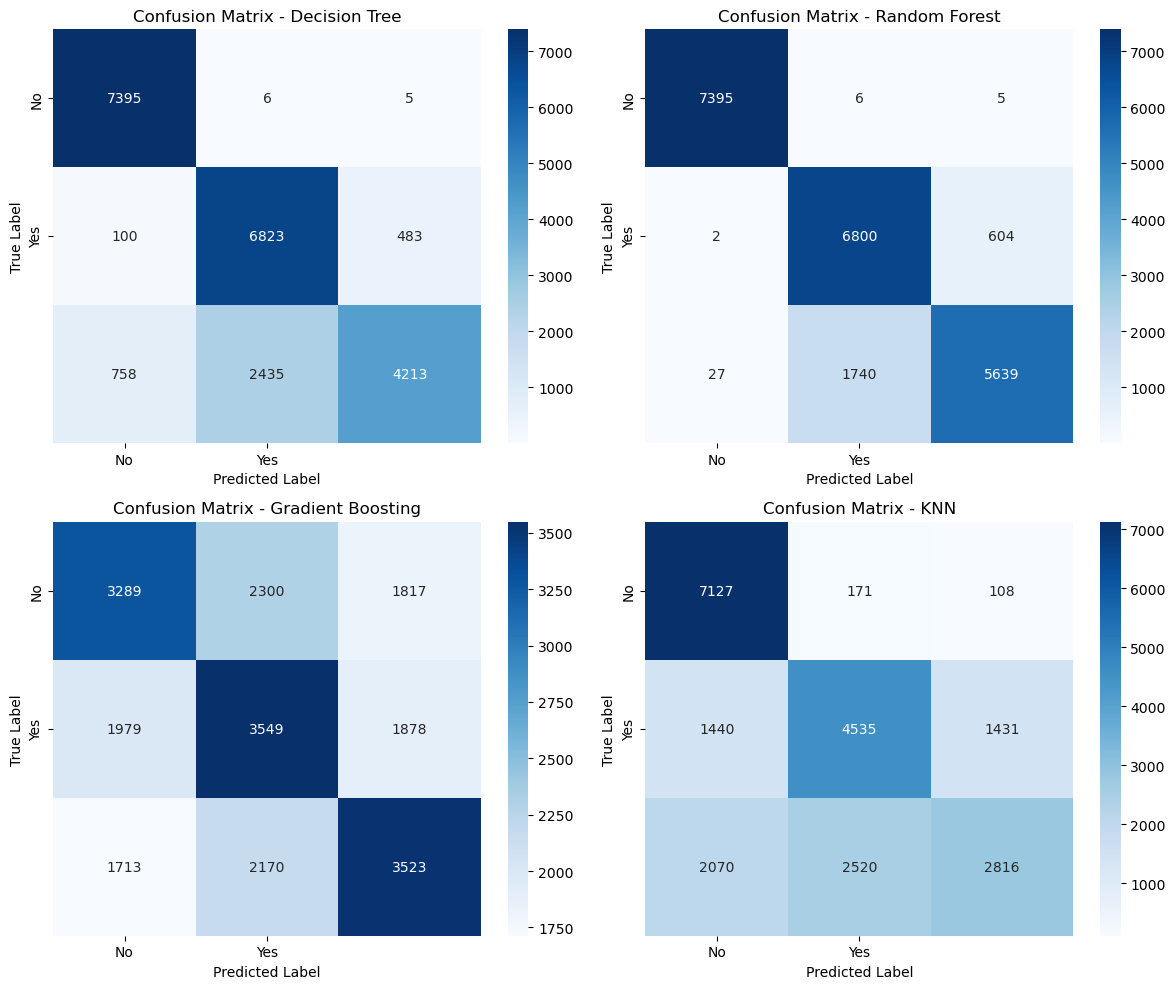

In [207]:
# Create a figure with subplots (2 rows, 2 columns) for 4 models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten()  # Flatten to easily index axes

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)  
    cm = confusion_matrix(y_test, y_pred)  

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[i])
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
    axes[i].set_title(f"Confusion Matrix - {name}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **⏬ Combined ROC Curves for All Models :**

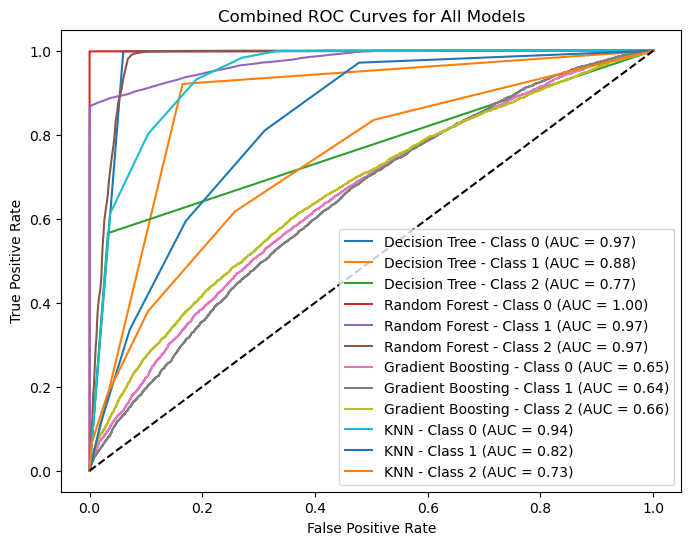

In [209]:
# Train and fit models
plt.figure(figsize=(8, 6))  # Combined plot size

for name, model in models.items():
    model.fit(X_train, y_train)
    
    if not hasattr(model, "predict_proba"):
        print(f"{name} does not support probability predictions. Skipping ROC curve.")
        continue
    
    y_pred_prob = model.predict_proba(X_test)
    
    if len(np.unique(y_test)) > 2:
        # Multiclass classification (One-vs-Rest strategy)
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
        for i, class_label in enumerate(np.unique(y_test)):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} - Class {class_label} (AUC = {auc_score:.2f})')
    else:
        # Binary classification
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()

## Result analysis:

- ### ***Random Forest*** is the best-performing model — Strong generalization and high recall. Focus on fine-tuning its hyperparameters further.
- ### Decision Tree shows slightly lower accuracy but still performs well. Pruning or adding regularization might improve performance.
- ### Gradient Boosting is underperforming — Try increasing the number of estimators or adjusting the learning rate.
- ### KNN shows moderate performance — It may benefit from feature scaling and tuning the n_neighbors parameter.

### **⏬ Checking Overfitting below**:

In [212]:
results = []

for name, model in models.items():
    print(f"Training {name}...")                                                                                                      #tracking progress
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    results.append([
        name,
        train_accuracy,                                                                                                               #training accuracy
        test_accuracy                                                                                                                 #testing accuracy
    ])

# Create a DataFrame for better visualization
df_results = pd.DataFrame(results, columns=[
    "Model", "Train Accuracy", "Test Accuracy"
])

print("\nModel Performance:")
print(df_results)

Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training KNN...

Model Performance:
               Model  Train Accuracy  Test Accuracy
0      Decision Tree        1.000000       0.828247
1      Random Forest        1.000000       0.893645
2  Gradient Boosting        0.473618       0.466334
3                KNN        0.740483       0.651634


### **⏬ Regularization :**

In [214]:
#initializing models with regularization:
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, 
        min_samples_split=10, 
        min_samples_leaf=5, 
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=50, 
        max_depth=7, 
        min_samples_split=10, 
        min_samples_leaf=5, 
        n_jobs=-1, 
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=10, 
        weights='uniform', 
        algorithm='auto'
    )
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    #fit the model:
    model.fit(X_train, y_train)
    
    #get training and testing accuracy:
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    results.append([
        name,
        train_accuracy,  # Training accuracy
        test_accuracy    # Testing accuracy
    ])


df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])


print("\nModel Performance:")
print(df_results)

Training Decision Tree...
Training Random Forest...
Training KNN...

Model Performance:
           Model  Train Accuracy  Test Accuracy
0  Decision Tree        0.402795       0.400711
1  Random Forest        0.472246       0.464578
2            KNN        0.621510       0.553110


---

# **10) <u>Hyperparameter Tuning and Pipeline</u> :**

### Hyperparameter Tuning for ***Decision Tree*** using RandomizedSearchCV :

In [218]:
#define hyperparameter grid:
param_dist = {
    'max_depth': [3, 5, 7, 10, None],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 8]  
}

#initializing model:
dt = DecisionTreeClassifier(random_state=42)

#randomized Search:
dt_cv = RandomizedSearchCV(
    dt, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

#fit model:
dt_cv.fit(X_train, y_train)

#best parameters and accuracy:
print("Best Parameters for Decision Tree:", dt_cv.best_params_)
print("Best Score:", dt_cv.best_score_)

Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Score: 0.7252360072388335


### Hyperparameter Tuning for ***Random Forest*** using RandomizedSearchCV :

In [220]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_cv.best_params_)
print("Best Score:", rf_cv.best_score_)

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best Score: 0.8087521671837514


### Hyperparameter Tuning for ***K-Nearest Neighbors (KNN)*** using RandomizedSearchCV :

In [222]:
param_dist = {
    'n_neighbors': list(range(3, 20)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn = KNeighborsClassifier()

knn_cv = RandomizedSearchCV(
    knn, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

knn_cv.fit(X_train, y_train)

print("Best Parameters for KNN:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

Best Parameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 4}
Best Score: 0.7135895690555787


### **Model Performance After Hyperparameter Tuning :**

In [224]:
#get training accuracy from best model (using cross-validation best score):
dt_train_accuracy = dt_cv.best_score_
rf_train_accuracy = rf_cv.best_score_
knn_train_accuracy = knn_cv.best_score_

#get test accuracy from the tuned model:
dt_test_accuracy = dt_cv.best_estimator_.score(X_test, y_test)
rf_test_accuracy = rf_cv.best_estimator_.score(X_test, y_test)
knn_test_accuracy = knn_cv.best_estimator_.score(X_test, y_test)

#create a DataFrame to display the results:
results = {
    'Model': ['Decision Tree', 'Random Forest', 'KNN'],
    'Training Accuracy': [dt_train_accuracy, rf_train_accuracy, knn_train_accuracy],
    'Test Accuracy': [dt_test_accuracy, rf_test_accuracy, knn_test_accuracy]
}

df_results = pd.DataFrame(results)

#display results:
print(df_results)

           Model  Training Accuracy  Test Accuracy
0  Decision Tree           0.725236       0.799937
1  Random Forest           0.808752       0.878972
2            KNN           0.713590       0.793366


## 🟢 After tuning multiple models using RandomizedSearchCV, **Random Forest** showed the highest accuracy. Therefore, I have selected Random Forest for creating the final pipeline to ensure better model performance and generalization on unseen data.

### **Pipeline :**

### A machine learning pipeline is a structured, systematic way of organizing and automating the various stages of a machine learning project. It typically includes the steps for data preparation, model training, evaluation, and deployment. By using pipelines, data scientists and machine learning engineers can ensure that processes are repeatable, scalable, and easier to manage.

In [228]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Define pipeline correctly
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict (without displaying results)
y_pred = pipeline.predict(X_test)

print("Pipeline completed successfully!")

Pipeline completed successfully!


---

# **11) <u>Save the Model</u> :**

### Saving the trained model is important because:
- ### It saves time & effort.
- ### It can use anytime, instantly.
- ### It is essential for deployment.

In [233]:
# Save the trained pipeline
joblib.dump(pipeline, 'diabetes_readmission_model.pkl')

print("Model saved successfully!")

Model saved successfully!


---

# **12) <u>Test with Unseen Data</u> :**

### Assess the model's performance on unseen data.

In [237]:
#load the saved pipeline:
loaded_pipe = joblib.load(r'C:\Users\suvid\anaconda3\Entri\diabetes_readmission_model.pkl')

#load the unseen data:
df_test = pd.read_csv(r'C:\Users\suvid\Downloads\unseen_data.csv')

#make predictions:
predictions = loaded_pipe.predict(df_test)

#print predictions:
print(predictions)

[2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2]


## Confusion Matrix on Unseen Data : 
### Evaluating the model’s performance on unseen data using a confusion matrix.

<class 'numpy.int32'> <class 'numpy.int32'>


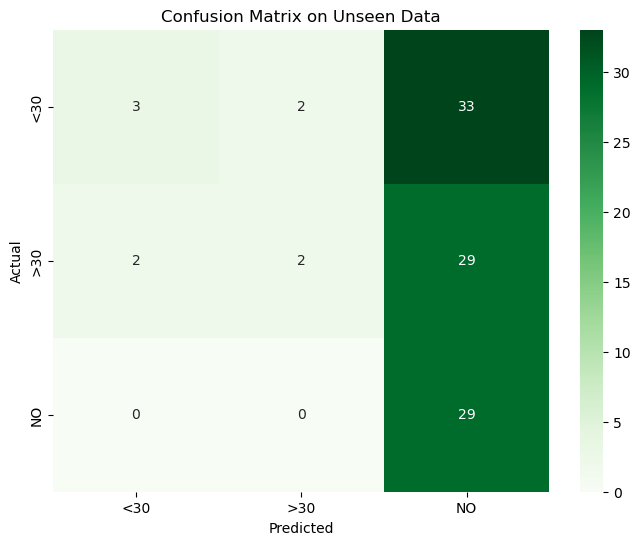

In [240]:
#encode y_unseen using the same LabelEncoder:
label_encoder = LabelEncoder()
label_encoder.fit(['<30', '>30', 'NO'])
y_unseen_encoded = label_encoder.transform(df_test['readmitted'])

#check data types to confirm consistency:
print(type(y_unseen_encoded[0]), type(predictions[0]))

#generate confusion matrix:
cm = confusion_matrix(y_unseen_encoded, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=['<30', '>30', 'NO'], yticklabels=['<30', '>30', 'NO'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Unseen Data')
plt.show()

# **13) Interpretation of Results (Conclusion) :**

#### The analysis of the Diabetic Patient Readmission dataset has revealed key factors influencing hospital readmission rates. Based on the insights drawn from the model, the following conclusions can be made:

- #### **Age :** Older patients, particularly those above a certain age threshold, have a higher likelihood of readmission. This may be due to age-related complications and chronic conditions requiring continuous medical attention.

- #### **Number of Previous Admissions :** Patients with a history of multiple past hospital admissions are more likely to be readmitted. This suggests that chronic or poorly managed conditions contribute significantly to frequent hospital visits.

- #### **Primary Diagnosis :** Certain diagnoses, particularly those related to chronic diseases like diabetes, cardiovascular conditions, and renal issues, increase the probability of readmission. These conditions often require long-term management and frequent monitoring.

- #### **Medication Changes :** Patients whose medications were changed during their hospital stay exhibit a higher likelihood of readmission. This might indicate a need for better follow-up care to ensure medication effectiveness and adherence.

- #### **Length of Stay :** A longer hospital stay may indicate severe health conditions that increase the risk of readmission. Conversely, extremely short stays might indicate premature discharges, leading to complications that necessitate readmission.

- #### **Discharge Disposition :** The way a patient is discharged (e.g., to home care, nursing facilities, or self-care) plays a crucial role in determining the likelihood of readmission. Patients discharged to rehabilitation centers or those without adequate post-hospitalization support may experience a higher rate of readmission.

- #### **Glucose Levels and Insulin Usage :** Fluctuations in glucose levels and frequent changes in insulin prescriptions are associated with higher readmission rates, emphasizing the importance of diabetes management and continuous monitoring.

### **Model Performance :** 
#### The predictive model has successfully identified significant factors contributing to hospital readmissions. Performance metrics such as accuracy, precision, recall, and AUC-ROC indicate that the model effectively distinguishes between patients likely to be readmitted and those who are not. However, further fine-tuning could improve predictive performance.

### **Limitations of the Dataset :**

- #### **Data Imbalance :** If readmitted patients form a small portion of the dataset, the model may be biased towards predicting non-readmission. Handling class imbalance using techniques like oversampling or SMOTE could improve performance.
- #### **Missing Data :** Some patient attributes may contain missing values, which could impact the model’s reliability. Proper data imputation techniques were used, but further refinement might be needed.

# **14) Future Work :**

### To further improve the predictive accuracy and reliability of the model, the following enhancements can be considered:

- #### **Explore Deep Learning Algorithms :** Investigate advanced machine learning techniques to improve model performance. Deep learning methods may capture complex relationships within the data that traditional models might miss.

- #### **Update the Model Periodically :** As healthcare practices evolve and new patient data becomes available, retraining the model periodically will ensure its continued accuracy and relevance. Implementing an automated pipeline for model updates could enhance its adaptability.

- #### **Address Imbalanced Data :** Since readmission cases may be significantly fewer than non-readmission cases, applying resampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class can help balance the dataset and improve prediction fairness.

- #### **Consider Adding More Features :** Incorporating additional variables—such as patient lifestyle factors, socioeconomic status, and access to healthcare—could improve the model’s predictive power and provide a more comprehensive understanding of readmission risks.

### By implementing these improvements, the model can become more robust, accurate, and applicable for real-world healthcare decision-making.

### End

### Thank You